In [73]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("data/my_gm.csv")

In [75]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [76]:
def new_ols(df):
    matrix = df['gdpPercap']
    model_matrix = sm.add_constant(matrix)
    y = df['lifeExp']
    model = sm.OLS(y, model_matrix)
    results = model.fit()
    return results
    
new_ols(df)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
def new_intercept(df):
    matrix = df['gdpPercap']
    model_matrix = sm.add_constant(matrix)
    y = df['lifeExp']
    model = sm.OLS(y, model_matrix)
    results = model.fit()
    return results
    
out = new_intercept(df)
pd.DataFrame({'slope': out.params})



,slope
const,53.955561
gdpPercap,0.000765


In [78]:
country_groups = df.groupby(['country'])

country_reg = country_groups[['gdpPercap']].agg(new_ols)
country_reg
country_reg['b0_intercept'] = [x.params[0] for x in country_reg.gdpPercap]
country_reg['b1_gdpPercap'] = [x.params[1] for x in country_reg.gdpPercap]
country_reg['b1_p'] = [x.pvalues[1] for x in country_reg.gdpPercap]
country_reg['adj_rsq'] = [x.rsquared for x in country_reg.gdpPercap]

country_reg.sort_values('adj_rsq',ascending=True).head(30)


,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
Botswana,<statsmodels.regression.linear_model.Regressio...,54.557534,0.000008,0.986227,0.000031
Mozambique,<statsmodels.regression.linear_model.Regressio...,40.144000,0.000434,0.970059,0.000148
Togo,<statsmodels.regression.linear_model.Regressio...,50.856992,0.000556,0.946991,0.000465
Afghanistan,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
Ghana,<statsmodels.regression.linear_model.Regressio...,49.887921,0.002348,0.856537,0.003430
Lesotho,<statsmodels.regression.linear_model.Regressio...,48.741192,0.001622,0.731632,0.012287
Rwanda,<statsmodels.regression.linear_model.Regressio...,37.490506,0.005907,0.679841,0.017742
Libya,<statsmodels.regression.linear_model.Regressio...,55.985062,0.000276,0.623543,0.025004
Sierra Leone,<statsmodels.regression.linear_model.Regressio...,39.673322,-0.002707,0.551617,0.036566


In [79]:
corr_coef = np.corrcoef(country_reg.b1_gdpPercap, country_reg.b0_intercept)[1,0]
corr_coef

-0.7559629406382983

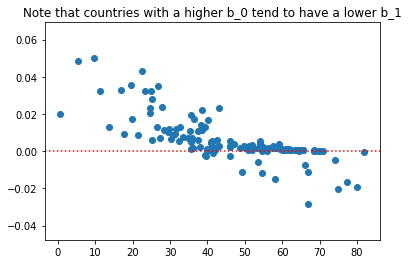

In [80]:
plt.scatter(country_reg.b0_intercept, country_reg.b1_gdpPercap)
plt.title("Note that countries with a higher b_0 tend to have a lower b_1")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

In [81]:
country_reg.sort_values('b0_intercept', ascending=False).head(20)
country_reg.sort_values('b1_gdpPercap', ascending=False).head(20)
country_reg.sort_values('adj_rsq', ascending=False).head(20)

,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
France,<statsmodels.regression.linear_model.Regressio...,64.129319,0.000543,6.007692e-12,0.992462
Austria,<statsmodels.regression.linear_model.Regressio...,63.909123,0.000450,1.341918e-10,0.985978
Belgium,<statsmodels.regression.linear_model.Regressio...,64.742805,0.000447,1.558814e-10,0.985552
Norway,<statsmodels.regression.linear_model.Regressio...,71.050415,0.000179,2.329244e-10,0.984345
Oman,<statsmodels.regression.linear_model.Regressio...,36.281689,0.001826,5.243908e-10,0.981591
United Kingdom,<statsmodels.regression.linear_model.Regressio...,65.148626,0.000453,8.166261e-10,0.979888
Italy,<statsmodels.regression.linear_model.Regressio...,64.532934,0.000584,8.716213e-10,0.979625
Israel,<statsmodels.regression.linear_model.Regressio...,63.853944,0.000691,1.560923e-09,0.977111
Denmark,<statsmodels.regression.linear_model.Regressio...,68.651654,0.000264,2.764325e-09,0.974346


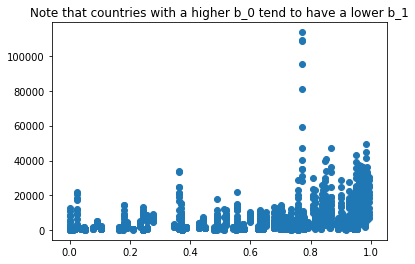

In [82]:
plt.scatter(master.adj_rsq, master.gdpPercap)
plt.title("Note that countries with a higher b_0 tend to have a lower b_1")
# plt.axhline(y=0, color='r', linestyle=':')
plt.show()

In [83]:
country_reg

,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
Afghanistan,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
Albania,<statsmodels.regression.linear_model.Regressio...,53.981907,0.004439,0.000682,0.700763
Algeria,<statsmodels.regression.linear_model.Regressio...,27.440225,0.007137,0.000053,0.818068
Angola,<statsmodels.regression.linear_model.Regressio...,41.614373,-0.001034,0.341620,0.090649
Argentina,<statsmodels.regression.linear_model.Regressio...,52.320078,0.001869,0.000797,0.691638
...,...,...,...,...,...
Vietnam,<statsmodels.regression.linear_model.Regressio...,40.221470,0.016958,0.002205,0.625013
West Bank and Gaza,<statsmodels.regression.linear_model.Regressio...,41.070333,0.005122,0.001807,0.639045
"Yemen, Rep.",<statsmodels.regression.linear_model.Regressio...,19.694607,0.017260,0.000001,0.912747


In [84]:
my_gm = df
my_gm

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [85]:
country_reg = country_reg.rename(columns={'gdpPercap':'model_object'})
master = pd.merge(my_gm, country_reg, on='country')
master

,country,continent,year,lifeExp,pop,gdpPercap,model_object,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291


In [86]:
def studentize(x):
    if np.issubdtype(x.dtype, np.number):
        centered = (x-np.mean(x))
        studentized = centered / np.std(x)
        return studentized
    else:
        return x


cols_of_interest = master
cols_of_interest = cols_of_interest.drop(['model_object', 'continent', 'country'], axis=1)
cols_of_interest


,year,lifeExp,pop,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
0,1952,28.801,8425333,779.445314,39.277201,-0.002240,0.883342,0.002261
1,1957,30.332,9240934,820.853030,39.277201,-0.002240,0.883342,0.002261
2,1962,31.997,10267083,853.100710,39.277201,-0.002240,0.883342,0.002261
3,1967,34.020,11537966,836.197138,39.277201,-0.002240,0.883342,0.002261
4,1972,36.088,13079460,739.981106,39.277201,-0.002240,0.883342,0.002261
...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,38.580853,0.022147,0.175545,0.175291
1700,1992,60.377,10704340,693.420786,38.580853,0.022147,0.175545,0.175291
1701,1997,46.809,11404948,792.449960,38.580853,0.022147,0.175545,0.175291
1702,2002,39.989,11926563,672.038623,38.580853,0.022147,0.175545,0.175291


In [87]:
studentized_cols = cols_of_interest.apply(studentize).add_prefix('stu_')
studentized_cols
master = pd.concat([master, studentized_cols], axis=1).reindex(master.index)